# This notebook show my issue with the calculation time of the enrichment function

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

In [2]:
import greatpy as great
import pandas as pd

In [6]:
test = pd.read_csv("../data/human/test_genomic_region.bed",sep="\t",comment="#",
                names=["Chr", "Chr_Start", "Chr_End"],dtype={"Chr":"object", "Chr_Start":"int64", "Chr_End":"int64"})

In [4]:
%lprun -f great.tl.enrichment great.tl.enrichment(test,"../data/human/regulatory_domain.bed","../data/human/chr_size.bed","../data/human/ontologies.csv",True,True,0.05,(0,0))

Timer unit: 1e-06 s

Total time: 30.7244 s
File: /home/tom/.local/lib/python3.8/site-packages/greatpy/tl/basic.py
Function: enrichment at line 318

Line #      Hits         Time  Per Hit   % Time  Line Contents
   318                                           def enrichment(test:str or pd.DataFrame,regdom_file,chr_size_file,annotation,binom=True,hypergeom=True,alpha=0.05,correction=("fdr",0.05),sort_by=None): 
   319                                               # Data import 
   320         1          7.0      7.0      0.0      if not binom and not hypergeom : 
   321                                                   return False
   322                                               
   323         2      53016.0  26508.0      0.2      regdom = pd.read_csv(regdom_file,sep="\t",comment="#",
   324         1          5.0      5.0      0.0                      names=["Chr", "Chr_Start", "Chr_End","Name","tss","Strand"],dtype={"Chr":"object", "Chr_Start":"int64", "Chr_End":"int64","Name":"

Here we can see that the calculation time of the enrichment function is very high due to : 

line 372 (30 %) in the https://github.com/theislab/greatpy/blob/correction/greatpy/tl/basic.py with gene_imply = ann[ann['id'].isin([i])] => I just want to subset the ann dataframe with the gene_id

line 377 (50 %) in the https://github.com/theislab/greatpy/blob/correction/greatpy/tl/basic.py with hit[i] = number_of_hit(test,curr_regdom) => The number_of_hit function is used to calculate the number of genomic region hit with each GO term 

In [7]:
from time import time
import matplotlib.pyplot as plt

In [22]:
def plot(test) : 
    x = []
    y = []
    for i in range(1,test.shape[0],20) : 
        test_red = test[:i]
        start = time()
        great.tl.enrichment(test_red,"../data/human/regulatory_domain.bed","../data/human/chr_size.bed","../data/human/ontologies.csv",True,True,0.05,(0,0))    
        end = time()
        x.append(i)
        y.append(end-start)
    plt.plot(x,y)
    plt.xlabel("number of tests")
    plt.ylabel("compuation time")
    plt.show()
    return x,y

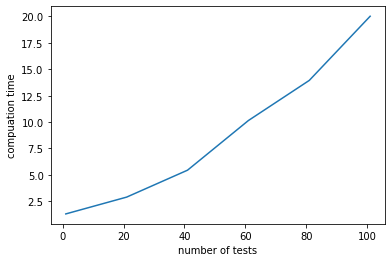

([1, 21, 41, 61, 81, 101],
 [1.3090479373931885,
  2.900681495666504,
  5.448145151138306,
  10.147513151168823,
  13.94391655921936,
  20.015532970428467])

In [23]:
plot(test)